In [1]:
cd ..

/home/wesg/research/ordinal-probing


In [11]:
# autoreload
%load_ext autoreload
%autoreload 2

import numpy as np
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import torch
from scipy.stats import rankdata
import seaborn as sns

from feature_datasets.common import *
import utils
import os

from probe_experiment import load_probe_results
from analysis.generalization import*
from analysis.probe_plots import *

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
experiment_name = 'test_refactor'
entity_type = 'us_place'
feature_name = 'coords'

models = ['Llama-2-7b-hf', 'Llama-2-13b-hf', 'Llama-2-70b-hf']
prompts = ['empty', 'where_us']

rdf = make_result_df(models, prompts, experiment_name, entity_type, feature_name)

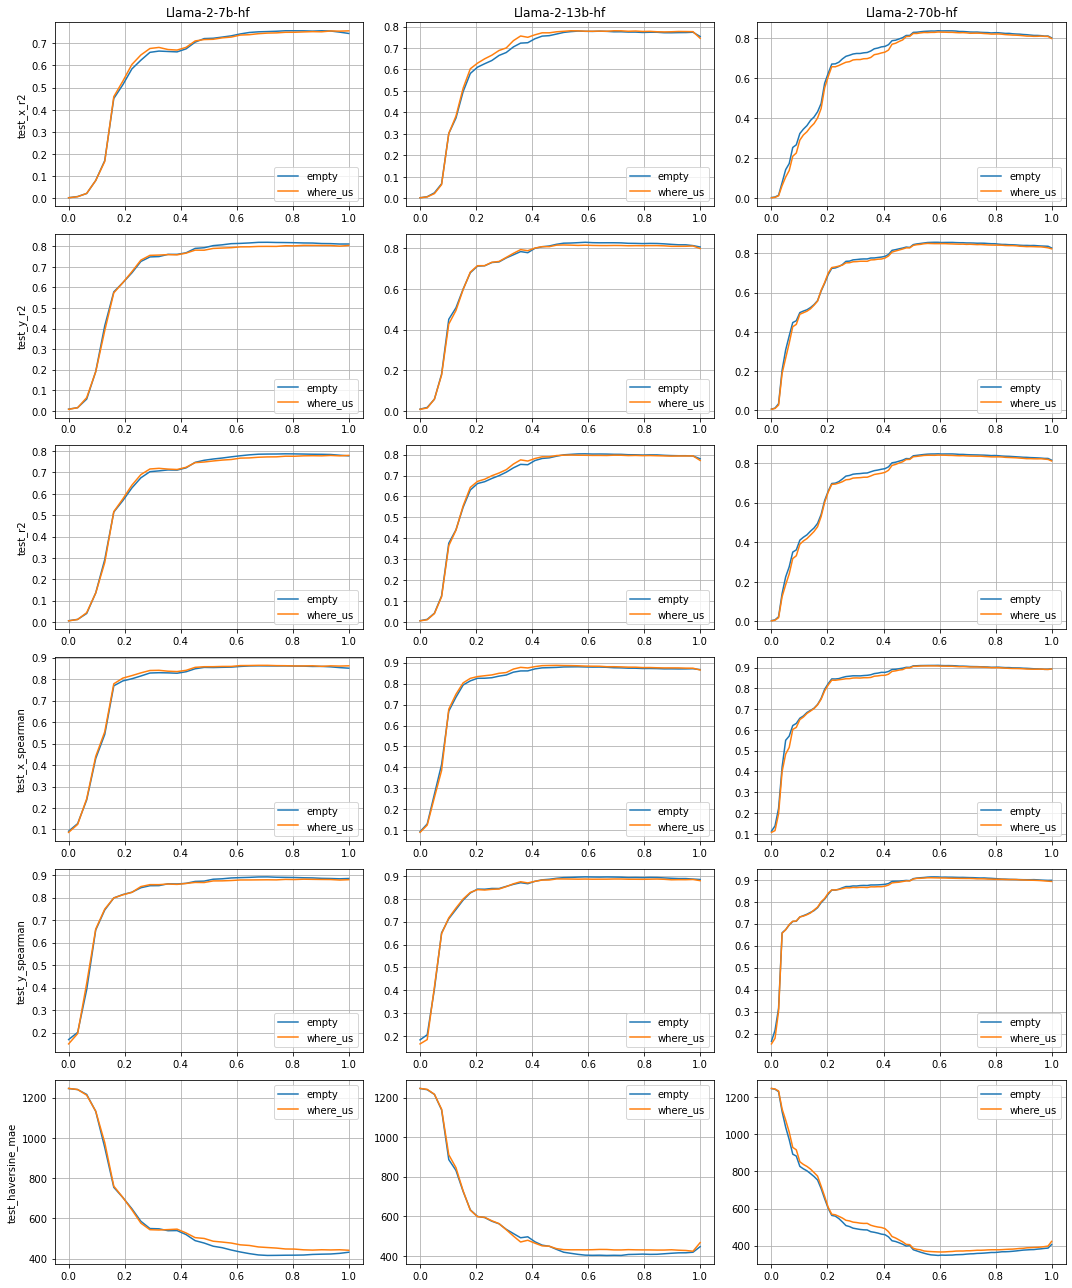

In [6]:
metrics = ['test_x_r2', 'test_y_r2', 'test_r2', 'test_x_spearman', 'test_y_spearman', 'test_haversine_mae']
performance_by_model_multiple_metrics(rdf, prompts, models, metrics=metrics);

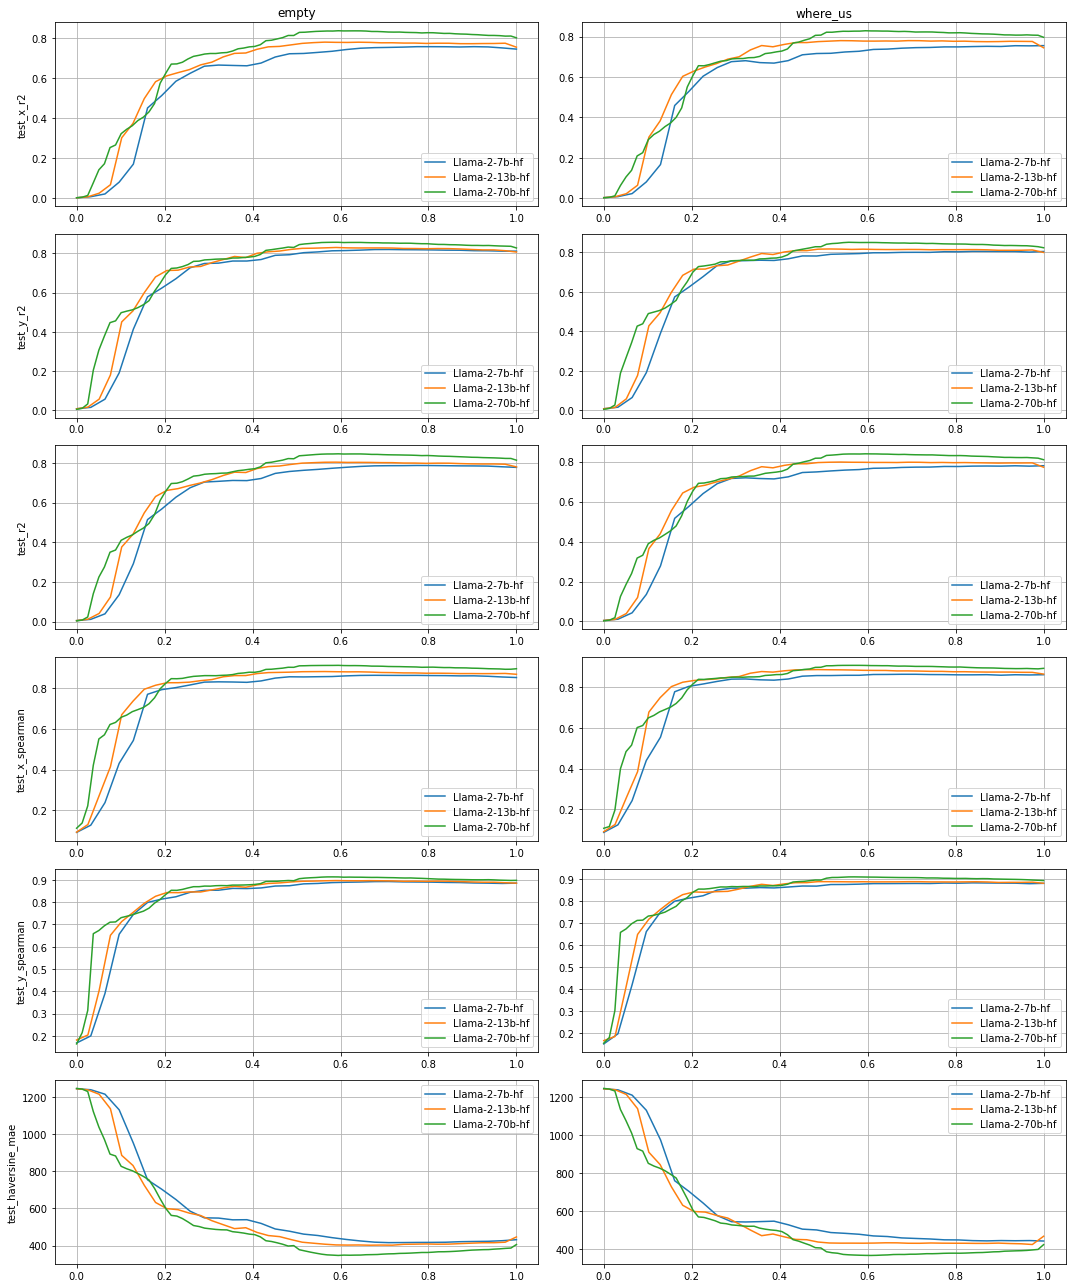

In [7]:
metrics = ['test_x_r2', 'test_y_r2', 'test_r2', 'test_x_spearman', 'test_y_spearman', 'test_haversine_mae']
performance_by_prompt_multiple_metrics(rdf, prompts, models, metrics=metrics);

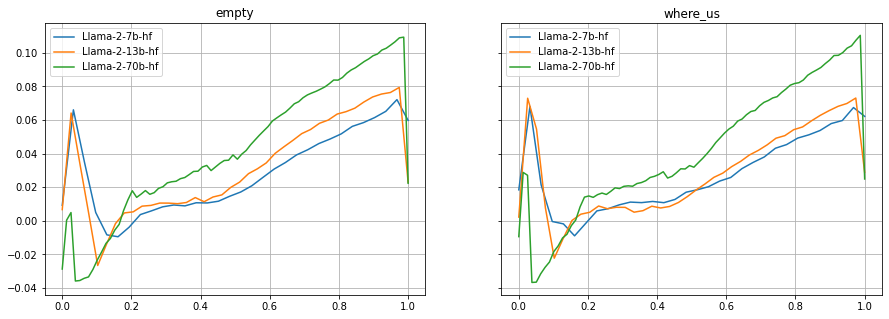

In [10]:
plot_generalization_gap(rdf, prompts, models)

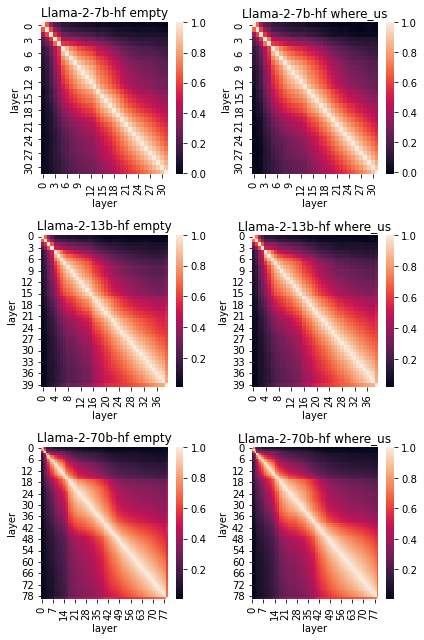

In [13]:
model_directions = make_probe_direction_matrices(models, prompts, experiment_name, entity_type, feature_name)
plot_probe_cosine_sim(model_directions, models, prompts, feature_dim=0)

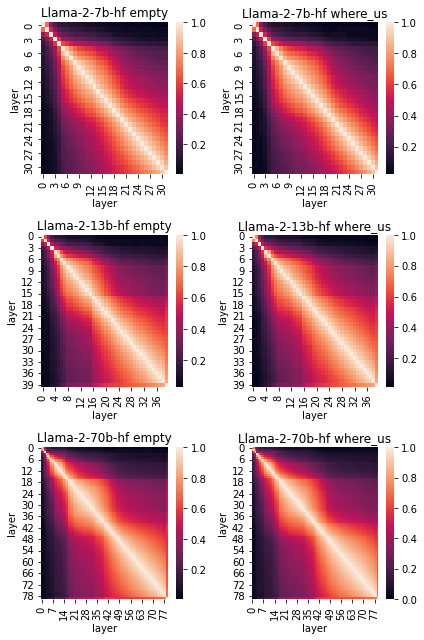

In [14]:
plot_probe_cosine_sim(model_directions, models, prompts, feature_dim=1)